In [1]:
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer

In [2]:
df = pd.read_csv(r'\Data\FB.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
5,2014-12-15,78.459999,78.580002,76.559998,76.989998,76.989998,29396500
6,2014-12-16,76.190002,77.389999,74.589996,74.690002,74.690002,31554600
7,2014-12-17,75.010002,76.410004,74.900002,76.110001,76.110001,29203900
8,2014-12-18,76.889999,78.400002,76.510002,78.400002,78.400002,34222100
9,2014-12-19,78.750000,80.000000,78.330002,79.879997,79.879997,43335000


In [4]:
X = df['Close']

In [5]:
test = X.iloc[-30:]

In [6]:
train = X.iloc[:-30]

In [ ]:
'''
Holt Winter’s Exponential Smoothing
Parameters: 

    endog (array-like) – Time series
    trend ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of trend component.
    damped (bool, optional) – Should the trend component be damped.
    seasonal ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of seasonal component.
    seasonal_periods (int, optional) – The number of seasons to consider for the holt winters.
    '''


In [ ]:
'''
fit Parameters: 

    smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.
    smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.
    smoothing_seasonal (float, optional) – The gamma value of the holt winters seasonal method, if the value is set then this value will be used as the value.
    damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.
    optimized (bool, optional) – Should the values that have not been set above be optimized automatically?
    use_boxcox ({True, False, 'log', float}, optional) – Should the boxcox tranform be applied to the data first? If ‘log’ then apply the log. If float then use lambda equal to float.
    remove_bias (bool, optional) – Should the bias be removed from the forecast values and fitted values before being returned? Does this by enforcing average residuals equal to zero.
    use_basinhopping (bool, optional) – Should the opptimser try harder using basinhopping to find optimal values?
'''


In [7]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')



In [8]:
from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],'seasonal' :['add', 'mul'],'seasonal_periods':[3,6,12], 'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False], 'use_boxcox':[True, False],
             'remove_bias':[True, False],'use_basinhopping':[True, False]}
pg = list(ParameterGrid(param_grid))


In [9]:
df_results_moni = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                        'damping_slope','damped','use_boxcox','remove_bias','use_basinhopping','RMSE','r2'])
start = timer()
print('Starting Grid Search..')
for a,b in enumerate(pg):
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    use_basinhopping = b.get('use_basinhopping')
    #print(trend,smoothing_level, smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping)
    fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level, 
                                    smoothing_slope=smoothing_slope, damping_slope = damping_slope,use_boxcox=use_boxcox,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    #print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    #print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'trend':trend,'seasonal_periods':seasonal_periods,'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope,
                                        'damping_slope':damping_slope,'damped':damped,'use_boxcox':use_boxcox,'use_basinhopping':use_basinhopping,'RMSE':RMSE,'r2':r2}, ignore_index=True)
print('End of Grid Search')
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


Starting Grid Search..
End of Grid Search
 Total time taken to complete grid search in seconds: 9433.836381199999


In [10]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)



 Below mentioned parameter gives least RMSE


,trend,seasonal_periods,smoothing_level,smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping,RMSE,r2
70605,mul,3,0.9,0.6,0.1,False,False,NaN,True,2.162275,0.744551


In [11]:
df_results_moni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139968 entries, 0 to 139967
Data columns (total 11 columns):
trend               139968 non-null object
seasonal_periods    139968 non-null object
smoothing_level     139968 non-null float64
smoothing_slope     139968 non-null float64
damping_slope       139968 non-null float64
damped              139968 non-null object
use_boxcox          139968 non-null object
remove_bias         0 non-null float64
use_basinhopping    139968 non-null object
RMSE                139968 non-null float64
r2                  139968 non-null float64
dtypes: float64(6), object(5)
memory usage: 11.7+ MB


In [8]:
fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=3 ).fit(smoothing_level=0.9, 
                                    smoothing_slope=0.6, damping_slope = 0.6,use_boxcox=False,use_basinhopping = True,optimized=False)



In [9]:
Forecast_custom_pred = fit1.forecast(30)

In [10]:
fit1.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,ExponentialSmoothing,SSE,12070.220
Optimized:,False,AIC,2815.700
Trend:,Multiplicative,BIC,2836.156
Seasonal:,None,AICC,2815.769
Seasonal Periods:,None,Date:,"Sun, 29 Dec 2019"
Box-Cox:,False,Time:,08:41:13
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_slope,0.6000000,beta,False


In [11]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 4.675431534981652
MAE is : 1.7892531792844002
RMSE is : 2.1622746206209915
MAPE is : 0.9154984217657036
R2 is : 0.7445509080821948



In [14]:
# Fitting model with optimized =True
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)

In [15]:
fitESAUTO.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,ExponentialSmoothing,SSE,8965.774
Optimized:,True,AIC,2446.285
Trend:,None,BIC,2456.513
Seasonal:,None,AICC,2446.318
Seasonal Periods:,None,Date:,"Sun, 29 Dec 2019"
Box-Cox:,False,Time:,08:41:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9808449,alpha,True
initial_level,76.519998,l.0,True


In [16]:
fitESAUTOpred = fitESAUTO.forecast(30)

In [17]:
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 97.68044338619876
MAE is : 8.909413652138449
RMSE is : 9.883341711496104
MAPE is : 4.516280753437192
R2 is : -4.336914972326928



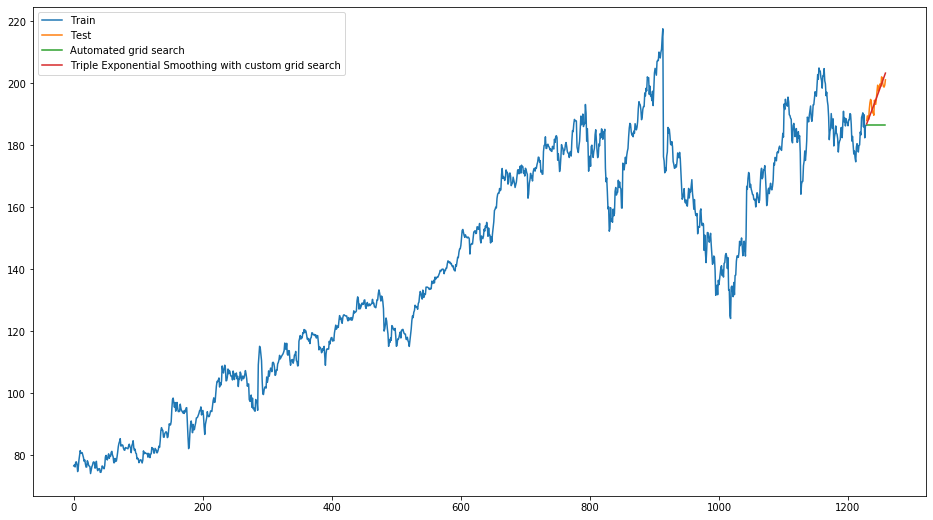

In [18]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()